In [1]:
from llmtosql.model import WikiSQLModel
from llmtosql.trainer import Trainer
from llmtosql.dataloader import WikiSQLDataset
from llmtosql.utils.utils import plot_history, load_model, load_history
from matplotlib import pyplot as plt
import sys
import os
import json
import numpy as np
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
# os.environ['PYTORCH_ENABLE_MPS_FALLBACK']='1'
sys.path.insert(0, '..')

In [2]:
print(os.environ["VIRTUAL_ENV"])

/Users/albertomerango/Library/Caches/pypoetry/virtualenvs/models-J3z1PC2Q-py3.9


In [3]:
path = '../WikiSQL/data/dev.jsonl'

In [4]:
train_set =  WikiSQLDataset(type='dev')

In [5]:
# val_set = WikiSQLDataset(type='dev')

In [6]:
len(train_set.data)

8421

In [7]:
# datasets = (train_set, val_set)

In [8]:
model = WikiSQLModel(base_model_type='bert-base-cased', attention_type='sqlnet', col_drop=True)
try:
    model = load_model(model, 'model_output/model.pth')
except Exception as e:
    print(f'No model loaded - {e}')

2023-03-01 22:38:32 [info     ] Using sqlnet attention mechanism


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


No model loaded - [Errno 2] No such file or directory: 'model_output/model.pth'


In [9]:
config = {
    'seed': 32,
    'scheduler': None,
    'optimizer': 'adam',
    'momentum': 0.9,
    'weight_decay': 0.0,
    'lr': 0.0005,
    'criterion': 'cross_entropy',
    'metric': 'accuracy',
    'pred_function': 'softmax',
    'model_dir': 'model_output',
    'backend': 'smddp'
}

In [10]:
trainer = Trainer(model, datasets=train_set,
                  epochs=10, batch_size=32,
                  is_parallel=False,
                  **config)

2023-03-01 22:38:34 [info     ] Config inputs.                 config={'seed': 32, 'scheduler': None, 'optimizer': 'adam', 'momentum': 0.9, 'weight_decay': 0.0, 'lr': 0.0005, 'criterion': 'cross_entropy', 'metric': 'accuracy', 'pred_function': 'softmax', 'model_dir': 'model_output', 'backend': 'smddp'}
2023-03-01 22:38:34 [info     ] Loading the model.
2023-03-01 22:38:34 [info     ] Training on device: cpu.
2023-03-01 22:38:34 [info     ] Loading training and validation set.
2023-03-01 22:38:34 [info     ] Preparing the data.
2023-03-01 22:38:34 [debug    ] Processes 8421/8421 (100%) of train data


In [11]:
trainer.fit()

2023-03-01 22:38:34 [info     ] Start training..
2023-03-01 22:38:34 [info     ] ------------------------------ EPOCH 1 / 10 ------------------------------


100%|██████████| 264/264 [2:02:27<00:00, 27.83s/batch, loss=2.43, metric=0.159]   

2023-03-02 00:41:02 [info     ] Saving the model.


2023-03-02 00:41:03 [info     ] train loss: 2.432824561993281 - train accuracy: 0.15944602272727273
2023-03-02 00:41:03 [info     ] ------------------------------ EPOCH 2 / 10 ------------------------------


100%|██████████| 264/264 [2:02:17<00:00, 27.79s/batch, loss=2.11, metric=0.176]   

2023-03-02 02:43:20 [info     ] Saving the model.


2023-03-02 02:43:21 [info     ] train loss: 2.1099774358850536 - train accuracy: 0.17552083333333332
2023-03-02 02:43:21 [info     ] ------------------------------ EPOCH 3 / 10 ------------------------------


100%|██████████| 264/264 [2:02:18<00:00, 27.80s/batch, loss=2.04, metric=0.198]    

2023-03-02 04:45:40 [info     ] Saving the model.


2023-03-02 04:45:40 [info     ] train loss: 2.0361869696414834 - train accuracy: 0.19839015151515152
2023-03-02 04:45:40 [info     ] ------------------------------ EPOCH 4 / 10 ------------------------------


100%|██████████| 264/264 [2:01:56<00:00, 27.71s/batch, loss=1.98, metric=0.219]   

2023-03-02 06:47:37 [info     ] Saving the model.


2023-03-02 06:47:37 [info     ] train loss: 1.9796405682961147 - train accuracy: 0.21860795454545454
2023-03-02 06:47:37 [info     ] ------------------------------ EPOCH 5 / 10 ------------------------------


100%|██████████| 264/264 [2:06:31<00:00, 28.76s/batch, loss=1.89, metric=0.262]   

2023-03-02 08:54:09 [info     ] Saving the model.


2023-03-02 08:54:10 [info     ] train loss: 1.893266441695618 - train accuracy: 0.2623106060606061
2023-03-02 08:54:10 [info     ] ------------------------------ EPOCH 6 / 10 ------------------------------


100%|██████████| 264/264 [2:13:55<00:00, 30.44s/batch, loss=1.79, metric=0.309]   

2023-03-02 11:08:06 [info     ] Saving the model.


2023-03-02 11:08:06 [info     ] train loss: 1.7861141977888164 - train accuracy: 0.3087594696969697
2023-03-02 11:08:06 [info     ] ------------------------------ EPOCH 7 / 10 ------------------------------


100%|██████████| 264/264 [2:07:43<00:00, 29.03s/batch, loss=1.66, metric=0.372]   

2023-03-02 13:15:50 [info     ] Saving the model.


2023-03-02 13:15:51 [info     ] train loss: 1.6649476754845995 - train accuracy: 0.3717329545454546
2023-03-02 13:15:51 [info     ] ------------------------------ EPOCH 8 / 10 ------------------------------


100%|██████████| 264/264 [2:09:32<00:00, 29.44s/batch, loss=1.52, metric=0.432]   

2023-03-02 15:25:23 [info     ] Saving the model.


2023-03-02 15:25:24 [info     ] train loss: 1.521327238191258 - train accuracy: 0.43222064393939397
2023-03-02 15:25:24 [info     ] ------------------------------ EPOCH 9 / 10 ------------------------------


100%|██████████| 264/264 [2:13:34<00:00, 30.36s/batch, loss=1.39, metric=0.485]   

2023-03-02 17:38:59 [info     ] Saving the model.


2023-03-02 17:39:00 [info     ] train loss: 1.391149552256772 - train accuracy: 0.4854640151515151
2023-03-02 17:39:00 [info     ] ------------------------------ EPOCH 10 / 10 ------------------------------


100%|██████████| 264/264 [2:07:14<00:00, 28.92s/batch, loss=1.28, metric=0.543]   

2023-03-02 19:46:14 [info     ] Saving the model.


2023-03-02 19:46:15 [info     ] train loss: 1.2752974302028164 - train accuracy: 0.5425662878787879
2023-03-02 19:46:15 [info     ] Training Complete.


In [12]:
trainer.save_history_('model_output')

2023-03-02 19:46:15 [info     ] Saving the training history.


In [13]:
history = load_history('model_output')

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

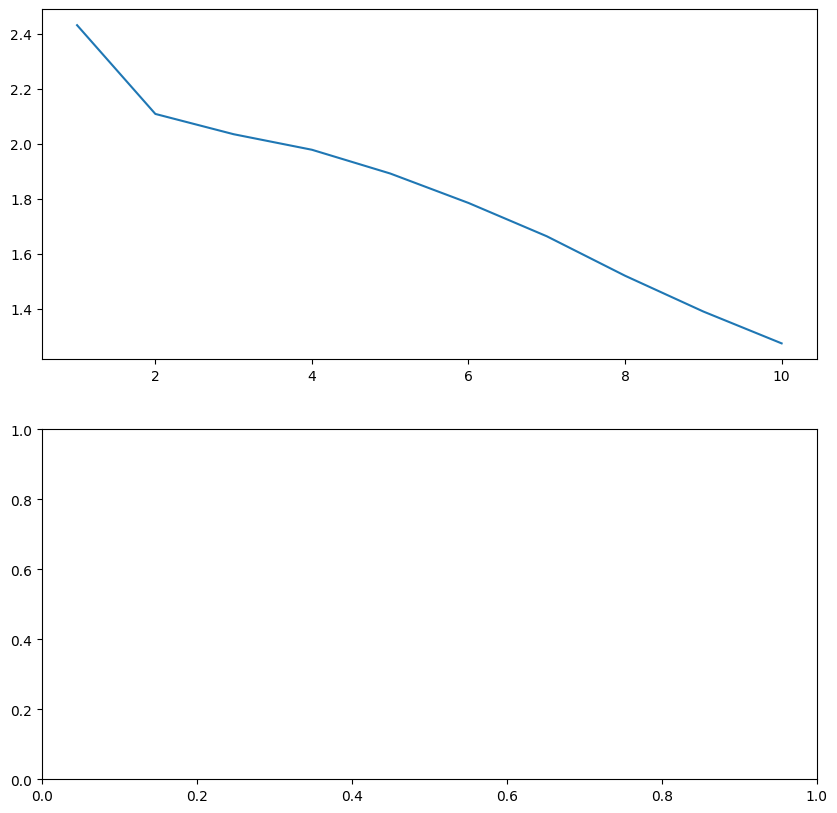

In [14]:
plot_history(history)

In [ ]:
model = MLModel()
model = load_model(model, 'model_output/model.pth')
test_loss, test_accuracy = trainer.test(model, trainer.val_loader)

In [ ]:
print(f'Model accuracy on test: {test_accuracy}')